In [1]:
# THIS IS ONLY TO RUN IT ON GOOGLE COLAB

# !pip install geopandas

In [ ]:
# THIS IS ONLY TO RUN IT ON GOOGLE COLAB

# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# THIS IS ONLY TO RUN IT ON GOOGLE COLAB

# !ls /content/gdrive/My\ Drive/Colab\ Notebooks/input

In [19]:
# read ascii file into pandas skipping lines (10)
import pandas as pd

    
# input_csfd = './input_CSFDs/01_Apollo_basin.diam'
input_csfd = 'https://data.planmap.eu/pub/moon/PM-MOO-MS-SPAApollo_01/vector/CSFDs/01_Apollo_basin.diam'

# for local use...
input_csfd = './01_Apollo_basin.diam'

# read file into pandas
input_pandas = pd.read_csv(input_csfd, skiprows=9, header=None,sep='\t', usecols=[0, 1, 2])

# give proper name to columns
input_pandas.columns = ['diameter', 'east_longitude', 'latitude']

input_pandas.head()

,diameter,east_longitude,latitude
0,18.946140,-156.484096,-27.214421
1,5.161139,-155.298265,-27.775753
2,20.595257,-155.036980,-28.205006
3,7.224989,-156.219940,-28.612726
4,3.897401,-156.290286,-28.209313


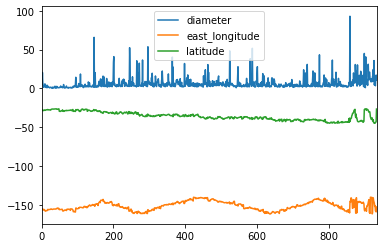

In [20]:
input_pandas.plot() # just to check

In [21]:
# make it geopandas and assign CRS (moon geographic)
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(input_pandas.east_longitude,input_pandas.latitude,)]
df = input_pandas.drop(['east_longitude', 'latitude'], axis=1)
crs = {'proj': 'longlat', 'a': '1737400', 'b': '1737400', 'no_defs': True}


gdf = GeoDataFrame(df, crs=crs, geometry=geometry)

In [22]:
gdf.head()

,diameter,geometry
0,18.946140,POINT (-156.484095817 -27.2144212052)
1,5.161139,POINT (-155.298264792 -27.7757528404)
2,20.595257,POINT (-155.03697999 -28.2050064437)
3,7.224989,POINT (-156.219939753 -28.6127255854)
4,3.897401,POINT (-156.290285661 -28.2093133361)


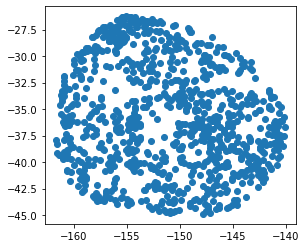

In [23]:
gdf.plot()

In [24]:
# merge in a single geopandas with a proper column value for each source CSFD

crs_map = {'proj': 'ortho', 'a': '1737400', 'b': '1737400', 
           'lat_0' : '-35.0', 'lon_0' : '-150.0', 'x_0' : '0', 'y_0' : '0', 'units' : 'm', 'no_defs': True}



In [25]:
# reproject to Orthographic

gdf_map = gdf.to_crs(crs_map)

In [26]:
gdf_map.head()

,diameter,geometry
0,18.946140,POINT (-174480.9922838854 229690.058111043)
1,5.161139,POINT (-141946.9825237022 214716.2894054758)
2,20.595257,POINT (-134429.0037784037 202172.8884946925)
3,7.224989,POINT (-165250.771522979 188132.7837232655)
4,3.897401,POINT (-167749.9457608171 200147.6434466641)


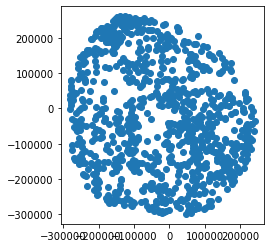

In [27]:
gdf_map.plot()

In [28]:
# export to geopackage

gdf_map.to_file("test_CSFD_centroids_SPAAPollo.gpkg", driver="GPKG")

In [29]:
!ls

01_Apollo_basin.diam               crater_outlines.gpkg
CSFD_2_gpkg_v02.ipynb              mappy_v01.ipynb
CSFD_2_gpkg_v03.ipynb              mappy_v01.ipynb.save
CSFD_2_gpkg_v04.ipynb              test_CSFD_centroids_SPAAPollo.gpkg
OWSLIB_Planmap_test_1.ipynb        tmp_data.json


--- 

--- 

In [30]:
# test for a single row
gdf_map.loc[0:0].diameter*500

0    9473.0699
Name: diameter, dtype: float64

In [31]:
# radius in meters ()
diameter_m = gdf_map.diameter*500
# generation of polygon as buffer with right radius (nominal crater outline) 
crater_outlines = gdf_map.buffer(diameter_m)

In [32]:
crater_outlines.head()

0    POLYGON ((-165007.9223838354 229690.058111043,...
1    POLYGON ((-139366.4129850772 214716.2894054758...
2    POLYGON ((-124131.3753457037 202172.8884946925...
3    POLYGON ((-161638.277233524 188132.7837232655,...
4    POLYGON ((-165801.2450908971 200147.6434466641...
dtype: object

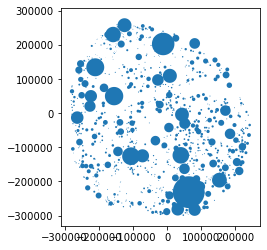

In [33]:
# once descartes is installed one can plot polygons. Meanwhile one can export to vector
from descartes import PolygonPatch 

crater_outlines.plot()


In [34]:
# export to GPKG
crater_outlines.to_file("crater_outlines.gpkg", driver="GPKG")